<a href="https://colab.research.google.com/github/TianziLuo/Machine-learning-/blob/main/Lung_Cancer_Prediction_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Linear Regression:**


1.   Supervised Learning
2.   Steps:
*   Analyzing the correlation and directionality of the data.
*   Estimating the model, i.e., fitting the line.
*   Evaluating the validity and usefulness of the model.






### **Import Libraries**:

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### **Loading Dataset**:

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd 
data=pd.read_csv('/content/gdrive/MyDrive/machine learning/survey lung cancer.csv')

### **DataSet Description:**
1.   Gender: M(male), F(female)
2.   Age: Age of the patient
3.   Smoking: YES=2 , NO=1.
4.   Yellow fingers: YES=2 , NO=1.
5.   Anxiety: YES=2 , NO=1.
6.   Peer_pressure: YES=2 , NO=1.
7.   Chronic Disease: YES=2 , NO=1.
8.   Fatigue: YES=2 , NO=1.
9.   Allergy: YES=2 , NO=1.
10.   Wheezing: YES=2 , NO=1.
11.   Alcohol: YES=2 , NO=1.
12.   Coughing: YES=2 , NO=1.
13.   Shortness of Breath: YES=2 , NO=1.
14.   Swallowing Difficulty: YES=2 , NO=1.
15.   Chest pain: YES=2 , NO=1.
16.   Lung Cancer: YES , NO.


In [5]:
# print top 5 rows
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [6]:
#print last 5 rows
data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [8]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


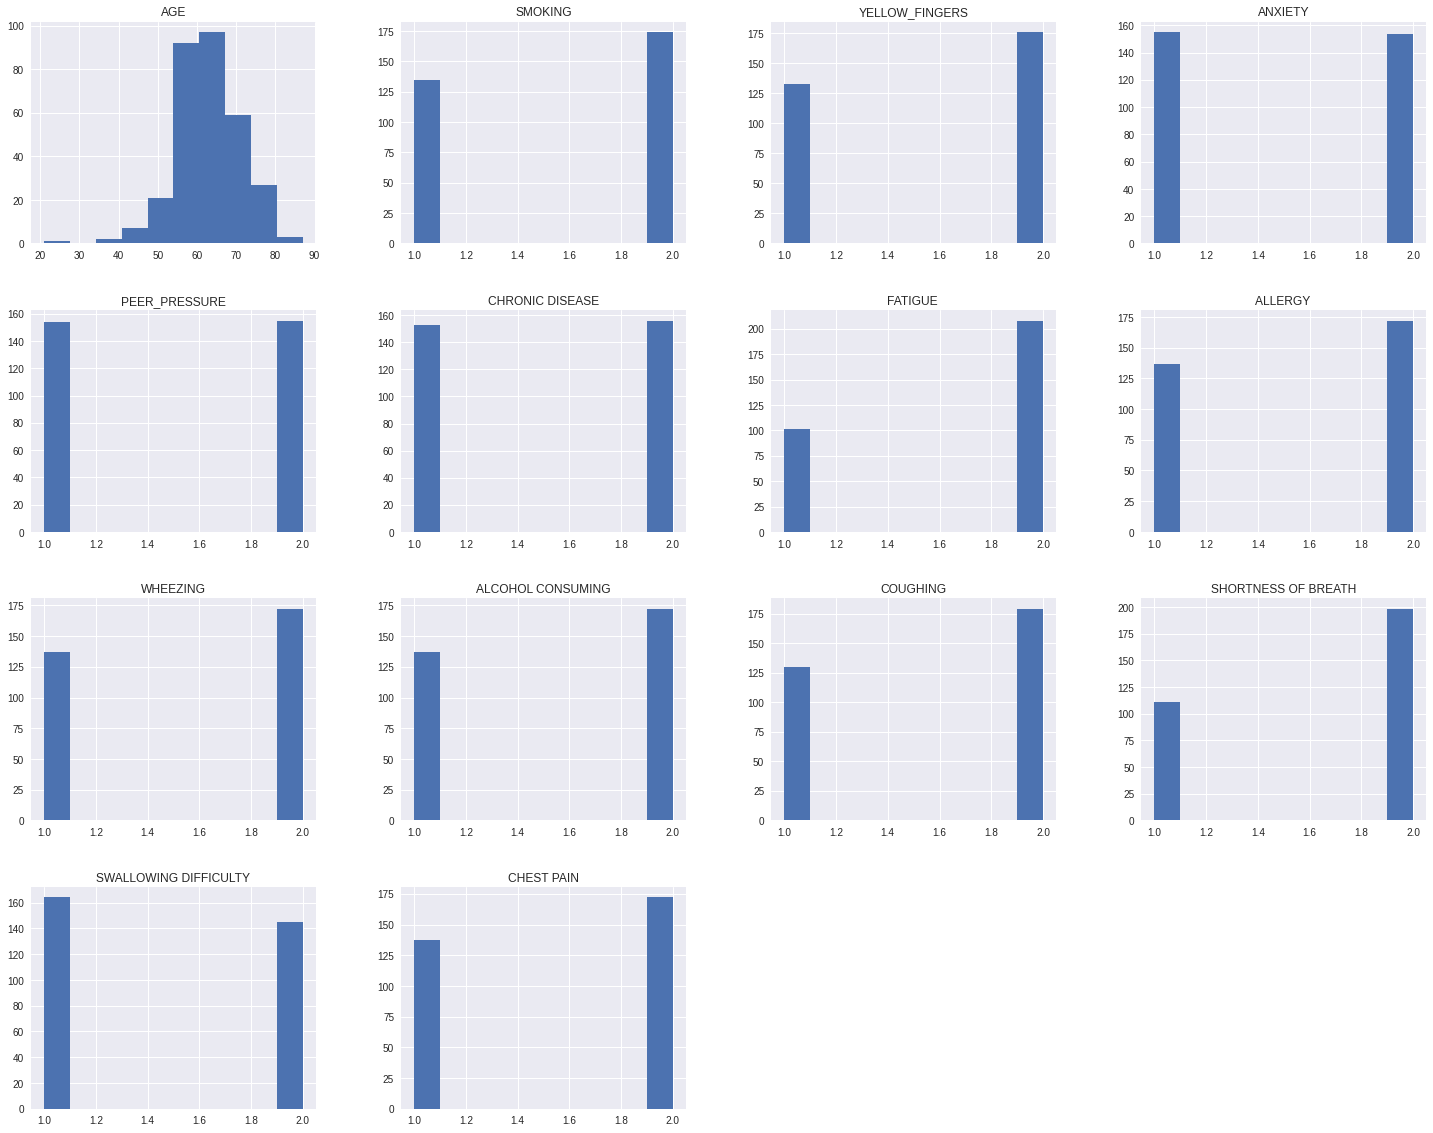

In [9]:
#plot styl; memoried
plt.style.use("seaborn")
data.hist(figsize=(25,20),bins=10);

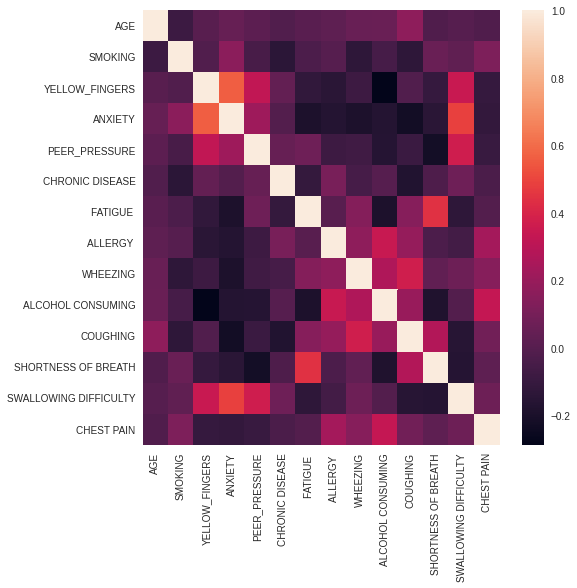

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr())

### **Split training and teseing set**:

In [11]:
from sklearn import preprocessing
data.columns.values
le = preprocessing.LabelEncoder()
#print(type(data['GENDER']))
ls = ['GENDER','SMOKING','LUNG_CANCER']
for i in ls:
  #print(i)
  le.fit(data[i])
  data[i] = le.transform(data[i])
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,1,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,0,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,1,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,0,2,1,1,1,1,1,2,1,2,2,1,1,0


In [12]:
le = preprocessing.LabelEncoder()
L = data.columns.values
for j in L:
  le.fit(data[j])
  data[j] = le.transform(data[j])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [13]:
# Get all the data in the first eight columns
X = data.iloc[:,1:2]
print(X)

     AGE
0     26
1     31
2     16
3     20
4     20
..   ...
304   13
305   27
306   15
307   24
308   19

[309 rows x 1 columns]


In [14]:
# label
y = data.iloc[:,15]

In [15]:
#import train_test_split from sklearn
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)
#print(X_train)

In [16]:
# Create Naive Bayes Classifier
classifier = linear_model.LinearRegression()
# Train the model using the training sets
classifier.fit(X_train,y_train)
# Predict the response for test dataset
y_pred = classifier.predict(X_test)

Coefficients: 
 [0.00215552]
Mean squared error: 0.14
Coefficient of determination: -0.01


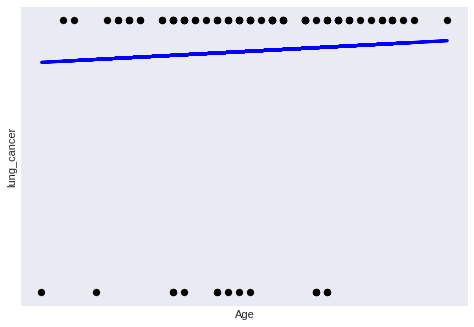

In [17]:
print("Coefficients: \n", classifier.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

#print(X_test)
#print(y_test)
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel('Age')
plt.ylabel('lung_cancer') 
plt.legend() 
plt.show()


In [30]:
# the input, x, and the output, y. 
# Call .reshape() on x because this array must be two-dimensional
x = np.random.randint(0,100,100).reshape(-1, 1)
y = np.random.randint(0,100,100)
#print(x)
#print(y)

In [31]:
classifier = linear_model.LinearRegression()
classifier.fit(x,y)
y_p = classifier.predict(x)
print("Mean squared error: %.2f" % mean_squared_error(y, y_p))

Mean squared error: 779.41


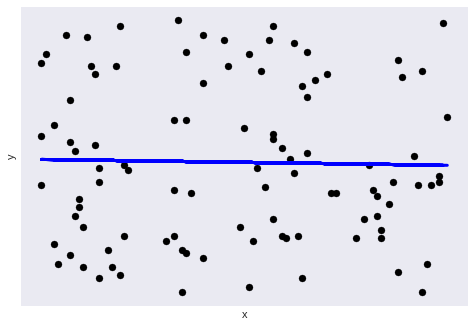

In [33]:
# Plot outputs
plt.scatter(x, y, color="black")
plt.plot(x, y_p, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel('x')
plt.ylabel('y') 
plt.legend() 
plt.show()
